In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import h5py
import matplotlib.patches as patches
from numpy import *
from PIL import Image

Text(0.5, 0, 'Components')

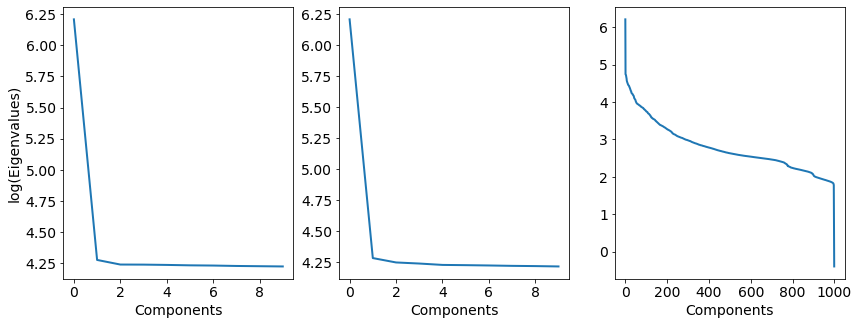

In [2]:
# Analysis eigenvalues from raw data with 240x244x1000
temp = sio.loadmat('E:\Denoising_Rungang\EDSdata\EDS_eigenvalues.mat')

fig = plt.figure(figsize=(14,5))

fig.add_subplot(131)
e1 = temp['e1']
e1 = e1[::-1]
plt.plot(np.log(e1[0:10]),linewidth='2')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.axvline(x=35,color='r',ls='--')
plt.ylabel('log(Eigenvalues)',fontsize=14)
plt.xlabel('Components',fontsize=14)

fig.add_subplot(132)
e2 = temp['e2']
e2 = e2[::-1]
plt.plot(np.log(e2[0:10]),linewidth='2')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.axvline(x=38,color='r',ls='--')
# plt.ylabel('Eigenvalues',fontsize=14)
plt.xlabel('Components',fontsize=14)

fig.add_subplot(133)
e3 = temp['e3']
e3 = e3[::-1]
plt.plot(np.log(e3[:1000]),linewidth='2')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.axvline(x=200,color='r',ls='--')
# plt.ylabel('Eigenvalues',fontsize=14)
plt.xlabel('Components',fontsize=14)

Text(0.5, 0, 'Components')

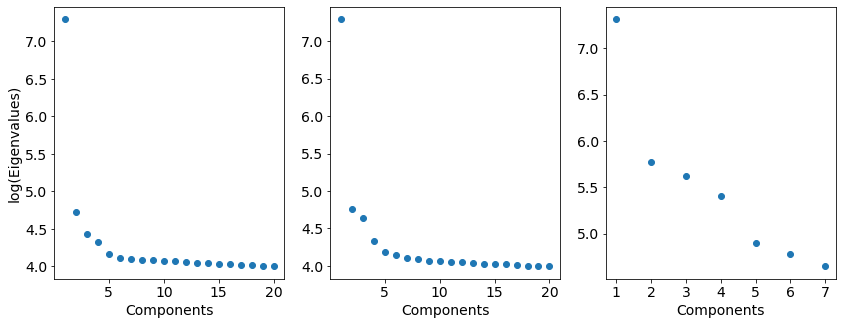

In [3]:
# Analysis eigenvalues from raw data with 240x244x7 channels
temp = sio.loadmat('E:\Denoising_Rungang\EDSdata\EDS_grouped_eigenvalues.mat')

fig = plt.figure(figsize=(14,5))

fig.add_subplot(131)
e1 = temp['e1']
e1 = e1[::-1]
plt.plot(np.linspace(1,20,20),np.log(e1[0:20]),'o',linewidth='2')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.axvline(x=35,color='r',ls='--')
plt.ylabel('log(Eigenvalues)',fontsize=14)
plt.xlabel('Components',fontsize=14)

fig.add_subplot(132)
e2 = temp['e2']
e2 = e2[::-1]
plt.plot(np.linspace(1,20,20),np.log(e2[0:20]),'o',linewidth='2')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.axvline(x=38,color='r',ls='--')
# plt.ylabel('Eigenvalues',fontsize=14)
plt.xlabel('Components',fontsize=14)

fig.add_subplot(133)
e3 = temp['e3']
e3 = e3[::-1]
plt.plot(np.linspace(1,7,7),np.log(e3),'o',linewidth='2')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.axvline(x=200,color='r',ls='--')
# plt.ylabel('Eigenvalues',fontsize=14)
plt.xlabel('Components',fontsize=14)

In [11]:
# Analysis denoise results from grouped EDS data
temp = sio.loadmat('E:\Denoising_Rungang\EDSdata\EDS_denoised_grouped_10-10-7.mat')
denoised = temp['est_HOOI']
temp = sio.loadmat('E:\Denoising_Rungang\EDSdata\EDS_grouped.mat')
noisy = temp['datacube']
temp = sio.loadmat('E:\Denoising_Rungang\EDSdata\EDS_NLPCA_grouped_17-10-10.mat')
NLPCA = temp['est_NLPCA']

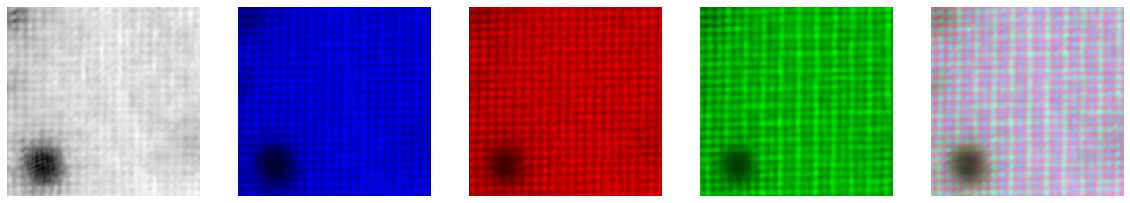

In [19]:
data = NLPCA[:]
data = data / np.amax(data) * 255
rgbArray = np.zeros([240,244,3],dtype=np.uint8)

fig = plt.figure(figsize=(20,5))

fig.add_subplot(151)
plt.imshow(data[:,:,0],cmap='gray')
plt.axis('off')

fig.add_subplot(152)
layer = data[:,:,1]
layer = layer/np.amax(layer)*255
rgbArray = np.zeros([240,244,3],dtype=np.uint8)
rgbArray[:,:,2] = layer.astype('int')*1
img = Image.fromarray(rgbArray)
plt.imshow(img)
plt.axis('off')

fig.add_subplot(153)
layer = data[:,:,2] + data[:,:,3]
layer = layer/np.amax(layer)*255
rgbArray = np.zeros([240,244,3],dtype=np.uint8)
rgbArray[:,:,0] = layer.astype('int')
img = Image.fromarray(rgbArray)
plt.imshow(img)
plt.axis('off')

fig.add_subplot(154)
layer = data[:,:,4] + data[:,:,5] + data[:,:,6]
layer = layer/np.amax(layer)*255
rgbArray = np.zeros([240,244,3],dtype=np.uint8)
rgbArray[:,:,1] = layer.astype('int')
img = Image.fromarray(rgbArray)
plt.imshow(img)
plt.axis('off')

fig.add_subplot(155)
rgbArray = np.zeros([240,244,3],dtype=np.uint8)
layer = data[:,:,1]
layer = layer/np.amax(layer)*255
rgbArray[:,:,2] = layer.astype('int')
layer = data[:,:,2] + data[:,:,3]
layer = layer/np.amax(layer)*255
rgbArray[:,:,0] = layer.astype('int')
layer = data[:,:,4] + data[:,:,5] + data[:,:,6]
layer = layer/np.amax(layer)*255
rgbArray[:,:,1] = layer.astype('int')
img = Image.fromarray(rgbArray)
plt.imshow(img)
plt.axis('off')

fig.savefig('E:/Denoising_Rungang/EDSdata/NLPCA_results.tif')

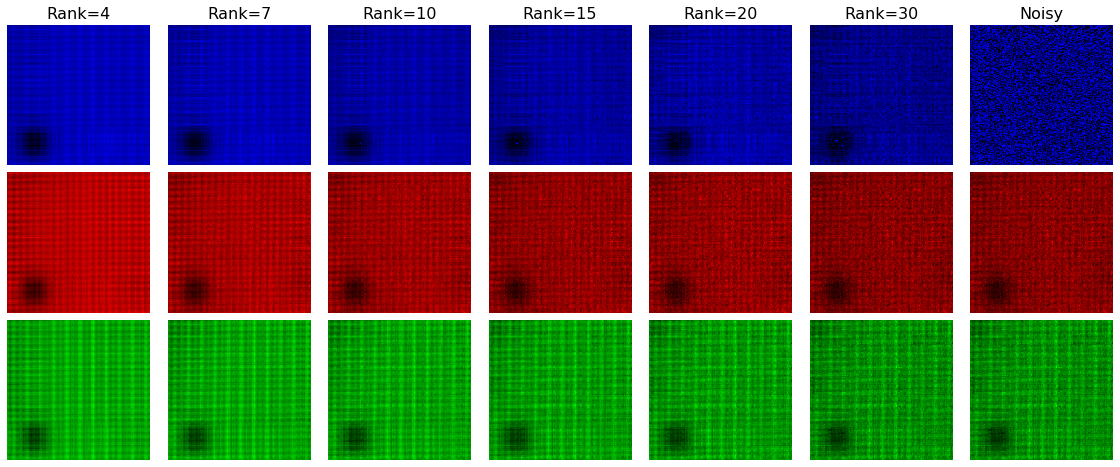

In [24]:
# Results from higher ranks along real space dimensions
fig = plt.figure(figsize=(20,8))

temp = sio.loadmat('E:\Denoising_Rungang\EDSdata\EDS_grouped.mat')
noisy = temp['datacube']

fig.add_subplot(3,7,7)
layer = data[:,:,1]
layer = layer/np.amax(layer)*255
rgbArray = np.zeros([240,244,3],dtype=np.uint8)
rgbArray[:,:,2] = layer.astype('int')*4
img = Image.fromarray(rgbArray)
plt.imshow(img)
plt.axis('off')
plt.title('Noisy',fontsize=16)

fig.add_subplot(3,7,14)
layer = data[:,:,2] + data[:,:,3]
layer = layer/np.amax(layer)*255
rgbArray = np.zeros([240,244,3],dtype=np.uint8)
rgbArray[:,:,0] = layer.astype('int')
img = Image.fromarray(rgbArray)
plt.imshow(img)
plt.axis('off')

fig.add_subplot(3,7,21)
layer = data[:,:,4] + data[:,:,5] + data[:,:,6]
layer = layer/np.amax(layer)*255
rgbArray = np.zeros([240,244,3],dtype=np.uint8)
rgbArray[:,:,1] = layer.astype('int')
img = Image.fromarray(rgbArray)
plt.imshow(img)
plt.axis('off')

rank_list = [4,7,10,15,20,30]
for irank in range(len(rank_list)):
    rank = rank_list[irank]
    path = 'E:\Denoising_Rungang\EDSdata\EDS_denoised_grouped_'+str(rank)+'-'+str(rank)+'-7.mat'
    temp = sio.loadmat(path)
    denoised = temp['est_HOOI']
    data = denoised[:]
    data = data / np.amax(data) * 255
    
    # Ca map
    fig.add_subplot(3,7,irank+1)
    layer = data[:,:,1]
    layer = layer/np.amax(layer)*255
    rgbArray = np.zeros([240,244,3],dtype=np.uint8)
    rgbArray[:,:,2] = layer.astype('int')
    img = Image.fromarray(rgbArray)
    plt.imshow(img)
    plt.title('Rank='+str(rank),fontsize=16)
    plt.axis('off')
    
    # Ti map
    fig.add_subplot(3,7,irank+1+7)
    layer = data[:,:,2] + data[:,:,3]
    layer = layer/np.amax(layer)*255
    rgbArray = np.zeros([240,244,3],dtype=np.uint8)
    rgbArray[:,:,0] = layer.astype('int')
    img = Image.fromarray(rgbArray)
    plt.imshow(img)
    plt.axis('off')
    
    # Nd map
    fig.add_subplot(3,7,irank+1+14)
    layer = data[:,:,4] + data[:,:,5] + data[:,:,6]
    layer = layer/np.amax(layer)*255
    rgbArray = np.zeros([240,244,3],dtype=np.uint8)
    rgbArray[:,:,1] = layer.astype('int')
    img = Image.fromarray(rgbArray)
    plt.imshow(img)
    plt.axis('off')
    
fig.subplots_adjust(wspace = 0.05, hspace = 0.05)